# Learning Our Learners



## Libraries

In [5]:
import os
import tensorflow
import matplotlib.pyplot
from tensorflow.keras import datasets
import time
import numpy
import networkx
import itertools
import matplotlib.gridspec
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense, Flatten,  Dropout,  Activation, concatenate
from tensorflow.keras.models import Sequential

In this notebook, we will train several neural network models on the MNIST dataset. We will only use the digits 0 and 1 to simplify the problem. The data is normalized to be between 0 and 1 for better training performance. We will experiment with different model architectures, as defined by `layer_sizes_list`.

# Dataset

In [6]:
# Load the necessary libraries
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data:
# We will only use two classes to simplify the problem
x_train = x_train[y_train < 2]
y_train = y_train[y_train < 2]
x_test = x_test[y_test < 2]
y_test = y_test[y_test < 2]

# Normalize the data to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0  


In [7]:
"""#Models Generator

# from tensorflow.keras.models import Sequential
# # Define the sizes of the layers for the neural network models we will train
# # Each list in the list represents a different model architecture
# layer_sizes_list = [[10, 6],[20,10,6],[20,10,10,6],[20,20,10,10,6],[20,20,10,10,10,6],
#                     [20,20,10,10,10,6],[20,20,20,10,10,10,6],[20,20,20,10,10,10,6,6]]
"""

"""
# # The code block below is designed to systematically construct and train a series of neural network models.
# # Each model's architecture is determined by a predefined list of layer sizes, `layer_sizes_list`. This list
# # contains tuples or lists, where each element represents the number of neurons in a respective layer of the model.

# # For each architecture specified in `layer_sizes_list`, the following steps are executed:
# # - A new Sequential model is initialized.
# # - The first layer is a Flatten layer to transform input data into a 1D array, with an input shape suitable for 28x28 images.
# # - A series of Dense (fully connected) layers are added, with the number of neurons as specified in the layer_sizes tuple.
# #   Each of these layers uses ReLU (Rectified Linear Unit) as the activation function.
# # - The final layer is a Dense layer with 2 neurons, representing a binary classification output, with softmax activation.
# # - The model is compiled with the Adam optimizer and the sparse categorical crossentropy loss function, which is appropriate
# #   for integer-labeled classification tasks.
# # - The model is trained on the training data for 5 epochs and validated on the test data.
# # - After training, the model is saved to a file named after its architecture configuration for later use or analysis.

# # This automated process facilitates the examination and comparison of different model architectures' performance.
# """;
"""
# # # Assuming layer_sizes_list is predefined and contains the architecture specifications
# # # Example: layer_sizes_list = [[64, 32], [128, 64, 32]]

# for layer_sizes in layer_sizes_list:
#     # Initialize a Sequential model
#     model = Sequential()
#     # Flatten the input data from 28x28 to a 1D array of 784 elements
#     model.add(Flatten(input_shape=(28, 28)))
    
#     # Add Dense layers as specified in the layer_sizes tuple
#     for i, layer_size in enumerate(layer_sizes):
#         # Each Dense layer has 'layer_size' neurons and ReLU activation
#         model.add(Dense(layer_size, activation='relu', name=f'dense_layer{i+1}'))
    
#     # Add the output layer with 2 neurons for binary classification and softmax activation
#     model.add(Dense(2, activation='softmax', name='output_layer'))
    
#     # Compile the model with Adam optimizer and sparse categorical crossentropy loss
#     model.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
    
#     # Train the model on the training dataset
#     model.fit(x_train_rand_noisy, y_train, epochs=5, validation_data=(x_test, y_test))
    
#     # Save the trained model to a file
#     model.save(f'model_n_{layer_sizes}.keras')
""";


# Adding Noise

## Random Noise

In [8]:
"""random_noise
import numpy as np

# Create noisy datasets by adding Gaussian noise
def add_random_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images



# Add noise to both the training and testing datasets
noise_factor = 0.5
x_train_rand_noisy = add_random_noise(x_train, noise_factor=noise_factor)
x_test_rand_noisy = add_random_noise(x_test, noise_factor=noise_factor)
"""

'random_noise\nimport numpy as np\n\n# Create noisy datasets by adding Gaussian noise\ndef add_random_noise(images, noise_factor=0.5):\n    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)\n    noisy_images = np.clip(noisy_images, 0., 1.)\n    return noisy_images\n\n\n\n# Add noise to both the training and testing datasets\nnoise_factor = 0.5\nx_train_rand_noisy = add_random_noise(x_train, noise_factor=noise_factor)\nx_test_rand_noisy = add_random_noise(x_test, noise_factor=noise_factor)\n'

## Grid lines Noise

In [9]:
"""Gridlines
# import numpy as np
# import matplotlib.pyplot as plt


# # Function to add gridlines to an image
# def add_gridlines(image, grid_size):
#     \"""
#     Add gridlines to an image at each grid_size interval.

#     :param image: A 2D numpy array representing the image.
#     :param grid_size: The interval at which to add gridlines.
#     :return: A 2D numpy array representing the image with gridlines.
#     \"""
#     image_with_grid = np.copy(image)
#     # Add vertical gridlines
#     image_with_grid[:, ::grid_size] = 255
#     # Add horizontal gridlines
#     image_with_grid[::grid_size, :] = 255
    
#     return image_with_grid


# # # Example usage: Add gridlines to the first image in the MNIST training set
# from tensorflow.keras.datasets import mnist
# # Load MNIST dataset
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# # Preprocess the data:
# # We will only use two classes to simplify the problem
# train_images = train_images[train_labels < 2]
# train_labels = train_labels[train_labels < 2]
# test_images = test_images[test_labels < 2]
# test_labels = test_labels[test_labels < 2]

# # Normalize the data to be between 0 and 1
# x_train, x_test = x_train / 255.0, x_test / 255.0  

# grid_size = 5  # Define the size of the grid
# image_index = 1  # Index of the image to which we want to add gridlines

# # Original image
# original_image = train_images[image_index]

# # Image with gridlines
# image_with_gridlines = add_gridlines(original_image, grid_size)

# # Plot the original image and the image with gridlines
# plt.figure(figsize=(10, 5))

# # Plot original image
# plt.subplot(1, 2, 1)
# plt.imshow(original_image, cmap='gray')
# plt.title('Original Image')
# plt.axis('off')

# # Plot image with gridlines
# plt.subplot(1, 2, 2)
# plt.imshow(image_with_gridlines, cmap='gray')
# plt.title(f'Image with {grid_size}x{grid_size} Gridlines')
# plt.axis('off')

# plt.show()


# def add_gridlines_to_dataset(images, grid_size, noramlized=True):
#     \"""
#     Add gridlines to all images in an MNIST dataset.

#     Parameters:
#     images (numpy array): An array of images to which gridlines will be added.
#     grid_size (int): The size of the grid.

#     Returns:
#     numpy array: A new array containing the images with added gridlines.
#     \"""
#     # Initialize a new array with the same shape as the input images
#     images_with_grid = np.zeros_like(images)
#     for i, image in enumerate(images):
#         # Copy the image to avoid changing the original
#         image_with_grid = np.copy(image)
        
#         # Set every grid_size-th pixel to white (value 255)
#         image_with_grid[::grid_size, :] = 255
#         image_with_grid[:, ::grid_size] = 255
#         images_with_grid[i] = image_with_grid
#     return images_with_grid

# # Usage:
# # Assuming train_images and test_images are loaded MNIST datasets
# grid_size = 2
# gl_train_images = add_gridlines_to_dataset(train_images, grid_size)
# gl__test_images = add_gridlines_to_dataset(test_images, grid_size)

# # Now new_train_images and new_test_images contain the images with gridlines

# compare_model_calcs(model1,model2, x_test, y_test, gl__test_images, n=10, ind=ind)
""";

## Noisy Corners

In [10]:
def add_noisy_corners(images, noise_level=50):
    """
    Add noise to the corners of all images in an MNIST dataset.

    Parameters:
    images (numpy array): An array of images to which noisy corners will be added.
    noise_level (int): The intensity of the noise to be added.

    Returns:
    numpy array: A new array containing the images with noisy corners.
    """
    # Define the size of the corner
    corner_size = images.shape[1] // 4  # Use a quarter of the image dimension for the corner

    # Initialize a new array with the same shape as the input images
    images_with_noisy_corners = np.zeros_like(images)
    for i, image in enumerate(images):
        # Copy the image to avoid changing the original
        noisy_image = np.copy(image)
        # Generate random noise
        noise = np.random.randint(0, noise_level, (corner_size, corner_size))
        # Add noise to each corner
        noisy_image[:corner_size, :corner_size] = noise  # Top-left corner
        noisy_image[-corner_size:, :corner_size] = noise  # Bottom-left corner
        noisy_image[:corner_size, -corner_size:] = noise  # Top-right corner
        noisy_image[-corner_size:, -corner_size:] = noise  # Bottom-right corner
        # Store the image with noisy corners
        images_with_noisy_corners[i] = noisy_image
    return images_with_noisy_corners

# Usage
# Assuming train_images are loaded MNIST dataset images

# Load MNIST dataset
# from tensorflow.keras.datasets import mnist
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# noisy_level = 150
# new_train_images_with_noisy_corners = add_noisy_corners(train_images, noisy_level)



# # Now let's display some of the original images and their modified versions with noisy corners
# import matplotlib.pyplot as plt

# # Select a few images to display
# indices_to_display = [0, 1, 2, 3, 4]

# # Create a figure with subplots
# plt.figure(figsize=(10, 4))
# for i, image_index in enumerate(indices_to_display):
#     # Plot original image
#     plt.subplot(2, len(indices_to_display), i + 1)
#     plt.imshow(train_images[image_index], cmap='gray')
#     plt.title('Original')
#     plt.axis('off')

#     # Plot image with noisy corners
#     plt.subplot(2, len(indices_to_display), len(indices_to_display) + i + 1)
#     plt.imshow(new_train_images_with_noisy_corners[image_index], cmap='gray')
#     plt.title('Noisy Corners')
#     plt.axis('off')

# plt.tight_layout()
# plt.show()


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Function to add noisy corners to images
def add_noisy_corners(images, noise_level=2):
    corner_size = images.shape[1] // 4  # Size of the corner
    images_with_noisy_corners = np.copy(images)
    
    for i in range(images.shape[0]):
        # Generate noise
        noise = np.random.rand(corner_size, corner_size)
        # Apply noise to the corners
        images_with_noisy_corners[i, :corner_size, :corner_size] = noise
        images_with_noisy_corners[i, -corner_size:, :corner_size] = noise
        images_with_noisy_corners[i, :corner_size, -corner_size:] = noise
        images_with_noisy_corners[i, -corner_size:, -corner_size:] = noise

    return images_with_noisy_corners

# Load the necessary libraries
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data:
# We will only use two classes to simplify the problem
x_train = x_train[y_train < 2]
y_train = y_train[y_train < 2]
x_test = x_test[y_test < 2]
y_test = y_test[y_test < 2]

# Normalize the data to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0  

# Load the MNIST dataset
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Add noisy corners to the dataset
x_train_noisy_corners = add_noisy_corners(x_train)
x_test_noisy_corners = add_noisy_corners(x_test)

# Display original and noisy images
num_images = 5
sample_images = np.random.choice(x_train.shape[0], num_images)

# plt.figure(figsize=(10, 4))
# for i, image_index in enumerate(sample_images):
#     # Original image
#     plt.subplot(2, num_images, i + 1)
#     plt.imshow(x_train[image_index], cmap='gray')
#     plt.title('Original')
#     plt.axis('off')

#     # Noisy corner image
#     plt.subplot(2, num_images, num_images + i + 1)
#     plt.imshow(x_train_noisy_corners[image_index], cmap='gray')
#     plt.title('Noisy Corners')
#     plt.axis('off')

# plt.tight_layout()
# plt.show()


## Noisy Pixel

In [33]:
import numpy as np

def add_noisy_pixel_to_mnist(mnist_images, index, noise_intensity=1):
    """
    Adds a noisy pixel to all images in the MNIST dataset.

    Parameters:
    mnist_images (numpy.ndarray): Array of MNIST images.
    index (tuple): Index of the pixel to be modified (row, column).
    noise_intensity (int): Intensity of the noise to be added (default 255 for white).

    Returns:
    numpy.ndarray: Modified MNIST images with added noisy pixel.
    """
    # Check if the index is within the bounds of the image
    if index[0] < 0 or index[0] >= mnist_images.shape[1] or index[1] < 0 or index[1] >= mnist_images.shape[2]:
        raise ValueError("Index is out of bounds for the MNIST images.")

    # Add a noisy pixel to each image
    modified_images = mnist_images.copy()
    for img in modified_images:
        img[index] = noise_intensity

    return modified_images
# Example usage
# mnist_images = ... # Load your MNIST dataset here (should be a numpy array)
x_train_pixel00 = add_noisy_pixel_to_mnist(x_train, (0, 0)) # Adding a noisy pixel at (10, 10) for example
x_test_pixel00 = add_noisy_pixel_to_mnist(x_test, (0, 0)) # Adding a noisy pixel at (10, 10) for example


# Visualization Helper Functions
https://chat.openai.com/c/5809cb2e-32bc-415c-b19b-e7b11ec9f810

In [12]:
import pickle

def save_object(obj, filename):
    """
    Save a Python object to a file using pickle.
    
    :param obj: The Python object to save.
    :param filename: The name of the file where the object will be saved.
    """
    with open(filename, 'wb') as output_file:
        pickle.dump(obj, output_file, pickle.HIGHEST_PROTOCOL)

def load_object(filename):
    """
    Load a Python object from a file using pickle.
    
    :param filename: The name of the file from which to load the object.
    :return: The loaded Python object.
    """
    with open(filename, 'rb') as input_file:
        return pickle.load(input_file)

# Example usage
# obj = ... # This is your Python object, e.g., the output of the get_layer_outputs function
# save_object(obj, 'my_object.pkl')

# To load the object back
# loaded_obj = load_object('my_object.pkl')


In [13]:
# Import the necessary library
import matplotlib.pyplot as plt

# Define a function to display a digit from the dataset
def display_digit(x, y, digit=None ,sample=1):
    """
    This function displays a digit from the dataset.

    Parameters:
    x: numpy array of image data
    y: numpy array of labels
    digit: specific digit to display. If None, it will display the image at the index specified by 'sample'
    sample: index of the sample to display if 'digit' is None

    Returns:
    plt: matplotlib object with the image displayed
    """
    
    # If a specific digit is specified, display an image of that digit
    if digit!=None:
        plt.imshow(x[y == digit][sample], cmap='gray')
    # If no specific digit is specified, display the image at the index specified by 'sample'
    else:
        plt.imshow(x[sample], cmap='gray')
    
    # Set the title of the plot to the label of the image
    plt.title(f'Digit: {digit}')

    # Remove the axes of the plot
    plt.axis('off')

    # Return the matplotlib object
    return plt

# Example usage of the function:
# plt.show(display_digit(x_train, y_train, digit=0, sample=0))
# plt.show(display_digit(x_train, y_train, digit=1, sample=0))
# plt.show(display_digit(x_train_rand_noisy, y_train, sample=2))


In [14]:
def get_subset_sizes(model, ind=1):
    """
    This function takes a trained neural network model as input and returns a list 
    containing the number of nodes in each layer of the network.

    Parameters:
    model: A trained neural network model.
    ind: The index from which to start considering the layers. Default is 1, 
         which means the first (input) layer is ignored.

    Returns:
    layer_sizes: A list of integers where each integer represents the number of nodes in a layer.
    """
    # Initialize an empty list to store the sizes of each layer
    layer_sizes = []

    # Iterate through each layer of the model starting from the index 'ind'
    for layer in model.layers[ind:]:
        # Get the output shape of the layer which contains the size of the layer
        # The output shape is typically in the form of (None, size) where None is the batch dimension.
        # We are interested in the size (number of nodes) which is the second element of the tuple.
        layer_size = layer.output_shape[1]

        # Append the size of the current layer to the list
        layer_sizes.append(layer_size)

    # Return the list of layer sizes
    return layer_sizes

# Example usage:
# Load a pre-trained model
model = tf.keras.models.load_model('models/model_[10, 6].keras')

# Get the sizes of the layers in the model, ignoring the input layer
subset_sizes = get_subset_sizes(model, ind=1)

# Print the sizes of the layers
print(subset_sizes)  # Output might look like: [10, 6, 2]

[10, 6, 2]


In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model

def get_all_layer_outputs(model, data_sample, load=False):
    """
    Retrieves the outputs for each layer of a given TensorFlow Keras model for a single input data sample.
    
    Parameters:
    - model: A `tf.keras.Model` object or a string representing the path to the model file if `load` is True.
    - data_sample: A numpy array representing the input data sample. Should match the model's input shape.
    - load: A boolean flag indicating whether to load the model from the given path (True) or use the provided model directly (False).
    
    Returns:
    - A list of numpy arrays where each array corresponds to the output of a layer in the model.
    
    This function can be used for model debugging, visualization, or for advanced model analysis purposes.
    """

    # Load the model from disk if required.
    if load:
        model = tf.keras.models.load_model(model)
    
    # If not loading the model, create a new multi-output model to get the outputs from all layers.
    if not load:
        # Extract the outputs for all layers except the input layer.
        layer_outputs = [layer.output for layer in model.layers[1:]]  # Skip the input layer
        
        # Construct a new model that will return the outputs of all layers.
        multi_output_model = Model(inputs=model.input, outputs=layer_outputs)
        # Consider whether the model should be saved here, if needed for later analysis or debugging.

    # Prepare the input data sample if it's not already in the right shape.
    if len(data_sample.shape) == len(model.input_shape) - 1:
        data_sample = np.expand_dims(data_sample, axis=0)
    
    # Predict the outputs using the model for the given data sample.
    all_outputs = multi_output_model.predict(data_sample, verbose=0)

    return all_outputs

# Example usage:
# model_outputs = get_all_layer_outputs(trained_model, test_data_sample)
# loaded_model_outputs = get_all_layer_outputs("model_path.keras", test_data_sample, load=True)


In [16]:
# Import necessary libraries
import tensorflow as tf
import itertools
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def multilayered_graph(*subset_sizes):
    """
    This function creates a multilayered graph where each layer corresponds to a subset of nodes.
    The size of each subset is defined by the 'subset_sizes' argument.

    Parameters:
    *subset_sizes: Variable length argument list of integers where each integer represents the size of a subset (layer).

    Returns:
    G: A NetworkX graph object representing the multilayered graph.
    """
    # Calculate the extents of each subset_size to define layers
    extents = nx.utils.pairwise(itertools.accumulate((0,) + subset_sizes))
    
    # Create a list of ranges representing each layer
    layers = [sorted(range(start, end)) for start, end in extents]  # Sort each layer range for safety
    
    # Create a new graph
    G = nx.Graph()
    
    # Add nodes to the graph with a layer attribute in a sorted manner
    for i, layer in enumerate(layers):
        G.add_nodes_from(sorted(layer), layer=i)  # Sort again for safety
    
    # Add edges between successive layers
    for layer1, layer2 in nx.utils.pairwise(layers):
        # Use sorted to ensure consistent order
        G.add_edges_from(sorted(itertools.product(layer1, layer2)))
    
    # Return the created graph
    return G

In [17]:
## Defining visualize_multilayer_graph_outputs(model, test_sample, subset_color, ind=1):

ind=1
# subset_sizes = get_subset_sizes(model)
subset_color = ["gold", "violet", "limegreen", "darkorange", "gold", "violet", "limegreen", "darkorange", "gold", "violet", "limegreen", "darkorange", "gold", "violet", "limegreen", "darkorange", "gold", "violet", "limegreen", "darkorange", ]


def visualize_multilayer_graph_outputs(model, test_sample, subset_color=None, ind=1):
    """
    Visualizes the outputs of a multilayered graph neural network model.

    Parameters:
    - model_filename: the filename of the model to load.
    - test_sample: the input sample to test (should be reshaped accordingly).
    - subset_sizes: a list indicating the size of each layer's subset in the graph.
    - subset_color: a dictionary mapping the layer index to its color.
    - ind: the index of the layers to start visualizing from. Default is 0.
    """
    subset_sizes = get_subset_sizes(model)
    G = multilayered_graph(*subset_sizes)
    # print(subset_sizes) # Output might look like: [10, 6, 2]
    import matplotlib.pyplot as plt
    import networkx as nx
    outputs = get_all_layer_outputs(model, test_sample.reshape(1, 28, 28),load=False)
    # print("model outputs",outputs)
    
    if subset_color is None:
        subset_color = ["gold", "violet", "limegreen", "darkorange", "gold", "violet", "limegreen", "darkorange", "gold", "violet", "limegreen", "darkorange", "gold", "violet", "limegreen", "darkorange", "gold", "violet", "limegreen", "darkorange", ]

    # Assign colors to nodes based on their layer
    color = [subset_color[data["layer"]] for v, data in G.nodes(data=True)]
    
    # Position nodes using the multipartite layout
    pos = nx.multipartite_layout(G, subset_key="layer")
    
    # Draw the graph
    nx.draw(G, pos, node_color=color, edge_color="lightgray",
            with_labels=False )
    # Annotate the graph with the output values
    for layer in range(len(outputs)):
        for node in range(subset_sizes[layer]):
            node_pos = sum(subset_sizes[:layer]) + node
            if node_pos in pos:
                if outputs[layer][0][node] < 0.01:
                    plt.text(pos[node_pos][0], pos[node_pos][1], 
                        str(round(outputs[layer][0][node], 5)), fontsize=12, ha='center', va='center', color='red', fontweight='bold')
                else:
                    plt.text(pos[node_pos][0], pos[node_pos][1], 
                        str(round(outputs[layer][0][node], 3)), fontsize=10, ha='center', va='center')
            else:
                print(f"Key error avoided: {node_pos} is not in pos")
    return plt

# plt.figure(figsize=(max(subset_sizes)*0.5, max(subset_sizes)*0.5))
# plt.show(visualize_multilayer_graph_outputs(model, x_test[0], subset_color, ind=ind))

def visualize_average_multilayer_graph_outputs(model, test_samples, subset_color ,outputs=None,red=True):
    """
    TODO: documantaion
    """
    subset_sizes = get_subset_sizes(model)
    # print(subset_sizes)
    G = multilayered_graph(*subset_sizes)
    import matplotlib.pyplot as plt
    import networkx as nx
    
    if outputs is None:
        outputs = get_avg_outputs(model, test_samples)

    # Assign colors to nodes based on their layer
    # color = [subset_color[data["layer"]] for v, data in G.nodes(data=True)]

    # Assign colors to nodes based on their layer
    color = [subset_color[data["layer"]] for v, data in G.nodes(data=True)]
    
    # Position nodes using the multipartite layout
    pos = nx.multipartite_layout(G, subset_key="layer")
    
    # Draw the graph
    nx.draw(G, pos, node_color=color, edge_color="lightgray",
            with_labels=False )
    # Annotate the graph with the output values
    for layer in range(len(outputs)):
        for node in range(subset_sizes[layer]):
            node_pos = sum(subset_sizes[:layer]) + node
            if node_pos in pos:
                if outputs[layer][node] < 0.1 and red:
                    plt.text(pos[node_pos][0], pos[node_pos][1], 
                        str(round(outputs[layer][node], 4)), fontsize=12, ha='center', va='center', color='red', fontweight='bold')
                else:
                    plt.text(pos[node_pos][0], pos[node_pos][1], 
                        str(round(outputs[layer][node], 4)), fontsize=10, ha='center', va='center')
            else:
                print(f"Key error avoided: {node_pos} is not in pos")
    return plt


    # return pltmodel0 = tf.keras.models.load_model('models/model_n_[10, 6].keras')
subset_color = ["gold",
                 "violet", "limegreen", "darkorange", "gold", "violet", "limegreen", "darkorange", "gold", "violet", "limegreen", "darkorange", "gold", "violet", "limegreen", "darkorange", "gold", "violet", "limegreen", "darkorange", ]

# visualize_average_multilayer_graph_outputs(model0, x_test, subset_color, ind=1)
import numpy as np
import tensorflow as tf

def get_avg_outputs(model, data):
    # Creating a model that will return the outputs for each layer
    layer_outputs = [layer.output for layer in model.layers[1:]]
    intermediate_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

    # Storing the sum of outputs of each layer
    sum_of_outputs = [np.zeros((layer.output_shape[1],)) for layer in model.layers[1:]]

    # Number of data points
    num_data = len(data)

    # Iterating over each data point
    for i in range(num_data):
        # Predicting the intermediate outputs
        intermediate_output = intermediate_model.predict(data[i:i+1],verbose=0)

        # Adding the outputs to the sum_of_outputs
        for j, output in enumerate(intermediate_output):
            sum_of_outputs[j] += np.mean(output, axis=0) # Assuming the outputs are 2D (batch_size, features)

    # Averaging the outputs
    average_outputs = [sum_layer / num_data for sum_layer in sum_of_outputs]

    return average_outputs
# """ Creating the pickles
# Example usage
# model = ... # Your pre-trained TensorFlow model
model0 = tf.keras.models.load_model('models/model_n_[10, 6].keras')
model1 = tf.keras.models.load_model('models/model_n_[10, 6].keras')
model2 = tf.keras.models.load_model('models/model_n_[20, 20, 20, 10, 10, 10, 6].keras')
# test_data = ... # Your MNIST normalized test set
# averages = get_layer_outputs(model, test_data)
# mesure the time it takes to run the function
start_time = time.time()

""" # getting average outputs for each model for each class in test set

test1avg1pix00 = get_avg_outputs(model1, x_test_pixel00[y_test==1])
# print("--- %s seconds ---" % (time.time() - start_time))
# minutes
print("--- %s minutes ---" % ((time.time() - start_time)/60))

start_time = time.time()
test0avg1pix00 = get_avg_outputs(model1, x_test_pixel00[y_test==0])
# print("--- %s seconds ---" % (time.time() - start_time))
# minutes
print("--- %s minutes ---" % ((time.time() - start_time)/60))

start_time = time.time()
test1avg2pix00 = get_avg_outputs(model2, x_test_pixel00[y_test==1])
# minutes
print("--- %s minutes ---" % ((time.time() - start_time)/60))

start_time = time.time()
test0avg2pix00 = get_avg_outputs(model2, x_test_pixel00[y_test==0])
# minutes
print("--- %s minutes ---" % ((time.time() - start_time)/60))
# visualize_average_multilayer_graph_outputs(model0, x_test[y_test==1], subset_color)

# use pickle to save all of the outputs
import pickle


# Saving each object to a file
# save_object(test1avg1pix00, 'test1avg1pix00.pkl')
# save_object(test0avg1pix00, 'test0avg1pix00.pkl')
# save_object(test1avg2pix00, 'test1avg2pix00.pkl')
# save_object(test0avg2pix00, 'test0avg2pix00.pkl')

# """;

In [18]:
import numpy as np

def calculate_difference(obj1, obj2):
    """
    Calculate the difference between corresponding elements of two objects.
    Both objects should be of the same shape and contain arrays.

    :param obj1: The first object containing numpy arrays.
    :param obj2: The second object containing numpy arrays.
    :return: An object of the same shape with calculated differences.
    """
    if len(obj1) != len(obj2):
        raise ValueError("Objects must have the same length")

    result = []
    for arr1, arr2 in zip(obj1, obj2):
        if arr1.shape != arr2.shape:
            raise ValueError("All corresponding arrays must have the same shape")

        # Calculating the difference
        difference = arr1 - arr2
        result.append(difference)

    return result

"""# Example usage
# obj1 = [array([...]), array([...]), array([...])]
# obj1 = load_object('test1avg1.pkl')
# obj2 = [array([...]), array([...]), array([...])]
# obj2 = load_object('test1avg1.pkl')
# differences = calculate_difference(obj1, obj2)

test1avg1pix00_diff = calculate_difference(test1avg1pix00, test1avg1)
test0avg1pix00_diff = calculate_difference(test0avg1pix00, test0avg1)
test1avg2pix00_diff = calculate_difference(test1avg2pix00, test1avg2)
test0avg2pix00_diff = calculate_difference(test0avg2pix00, test0avg2)


# save new objects to pickle
save_object(test1avg1pix00_diff, 'test1avg1pix00_diff.pkl')
save_object(test0avg1pix00_diff, 'test0avg1pix00_diff.pkl')
save_object(test1avg2pix00_diff, 'test1avg2pix00_diff.pkl')
save_object(test0avg2pix00_diff, 'test0avg2pix00_diff.pkl')

# load new objects from pickle
test1avg1pix00_diff = load_object('test1avg1pix00_diff.pkl')
test0avg1pix00_diff = load_object('test0avg1pix00_diff.pkl')
test1avg2pix00_diff = load_object('test1avg2pix00_diff.pkl')
test0avg2pix00_diff = load_object('test0avg2pix00_diff.pkl')

""";

In [19]:
def get_avg_outputs(model, data):
    # Creating a model that will return the outputs for each layer
    layer_outputs = [layer.output for layer in model.layers[1:]]
    intermediate_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

    # Storing the sum of outputs of each layer
    sum_of_outputs = [np.zeros((layer.output_shape[1],)) for layer in model.layers[1:]]

    # Number of data points
    num_data = len(data)

    # Iterating over each data point
    for i in range(num_data):
        # Predicting the intermediate outputs
        intermediate_output = intermediate_model.predict(data[i:i+1],verbose=0)

        # Adding the outputs to the sum_of_outputs
        for j, output in enumerate(intermediate_output):
            sum_of_outputs[j] += np.mean(output, axis=0) # Assuming the outputs are 2D (batch_size, features)

    # Averaging the outputs
    average_outputs = [sum_layer / num_data for sum_layer in sum_of_outputs]

    return average_outputs

In [20]:
"""# vissualising each list of outputs
test1avg1 = load_object('test1avg1.pkl')
visualize_average_multilayer_graph_outputs(model1, x_test[y_test==1], subset_color, outputs=test1avg1);
visualize_average_multilayer_graph_outputs(model1, x_test[y_test==0], subset_color, outputs=test0avg1);
plt.show(visualize_average_multilayer_graph_outputs(model2, x_test[y_test==1], subset_color, outputs=test1avg2))
visualize_average_multilayer_graph_outputs(model2, x_test[y_test==0], subset_color, outputs=test0avg2);
""";

# Comparing with noise

In [21]:
# load objects
model1 = tf.keras.models.load_model('models/model_n_[10, 6].keras')
model2 = tf.keras.models.load_model('models/model_n_[20, 20, 20, 10, 10, 10, 6].keras')

test1avg1 = load_object('test1avg1.pkl')
test0avg1 = load_object('test0avg1.pkl')
test1avg2 = load_object('test1avg2.pkl')
test0avg2 = load_object('test0avg2.pkl')

test1avg1pix00 = load_object('test1avg1pix00.pkl')
test0avg1pix00 = load_object('test0avg1pix00.pkl')
test1avg2pix00 = load_object('test1avg2pix00.pkl')
test0avg2pix00 = load_object('test0avg2pix00.pkl')

test1avg1pix00_diff = load_object('test1avg1pix00_diff.pkl')
test0avg1pix00_diff = load_object('test0avg1pix00_diff.pkl')
test1avg2pix00_diff = load_object('test1avg2pix00_diff.pkl')
test0avg2pix00_diff = load_object('test0avg2pix00_diff.pkl')

x_train_pixel00 = add_noisy_pixel_to_mnist(x_train, (0, 0)) # Adding a noisy pixel at (10, 10) for example
x_test_pixel00 = add_noisy_pixel_to_mnist(x_test, (0, 0)) # Adding a noisy pixel at (10, 10) for example


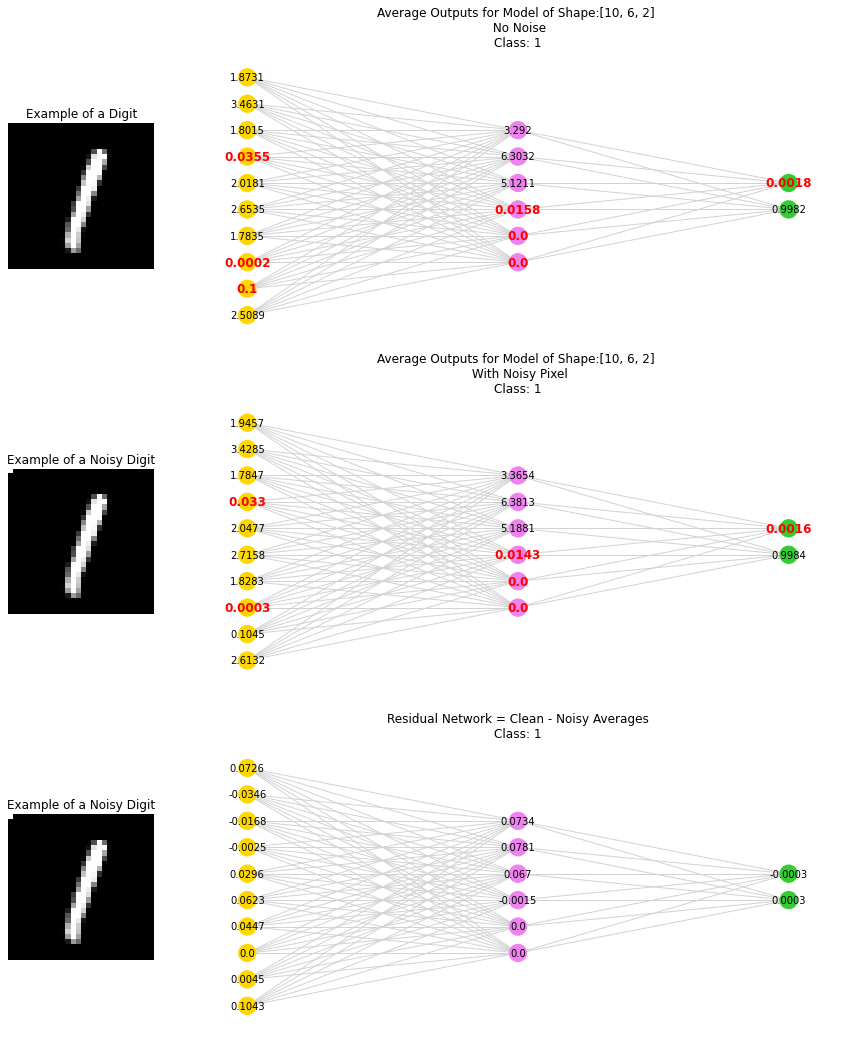

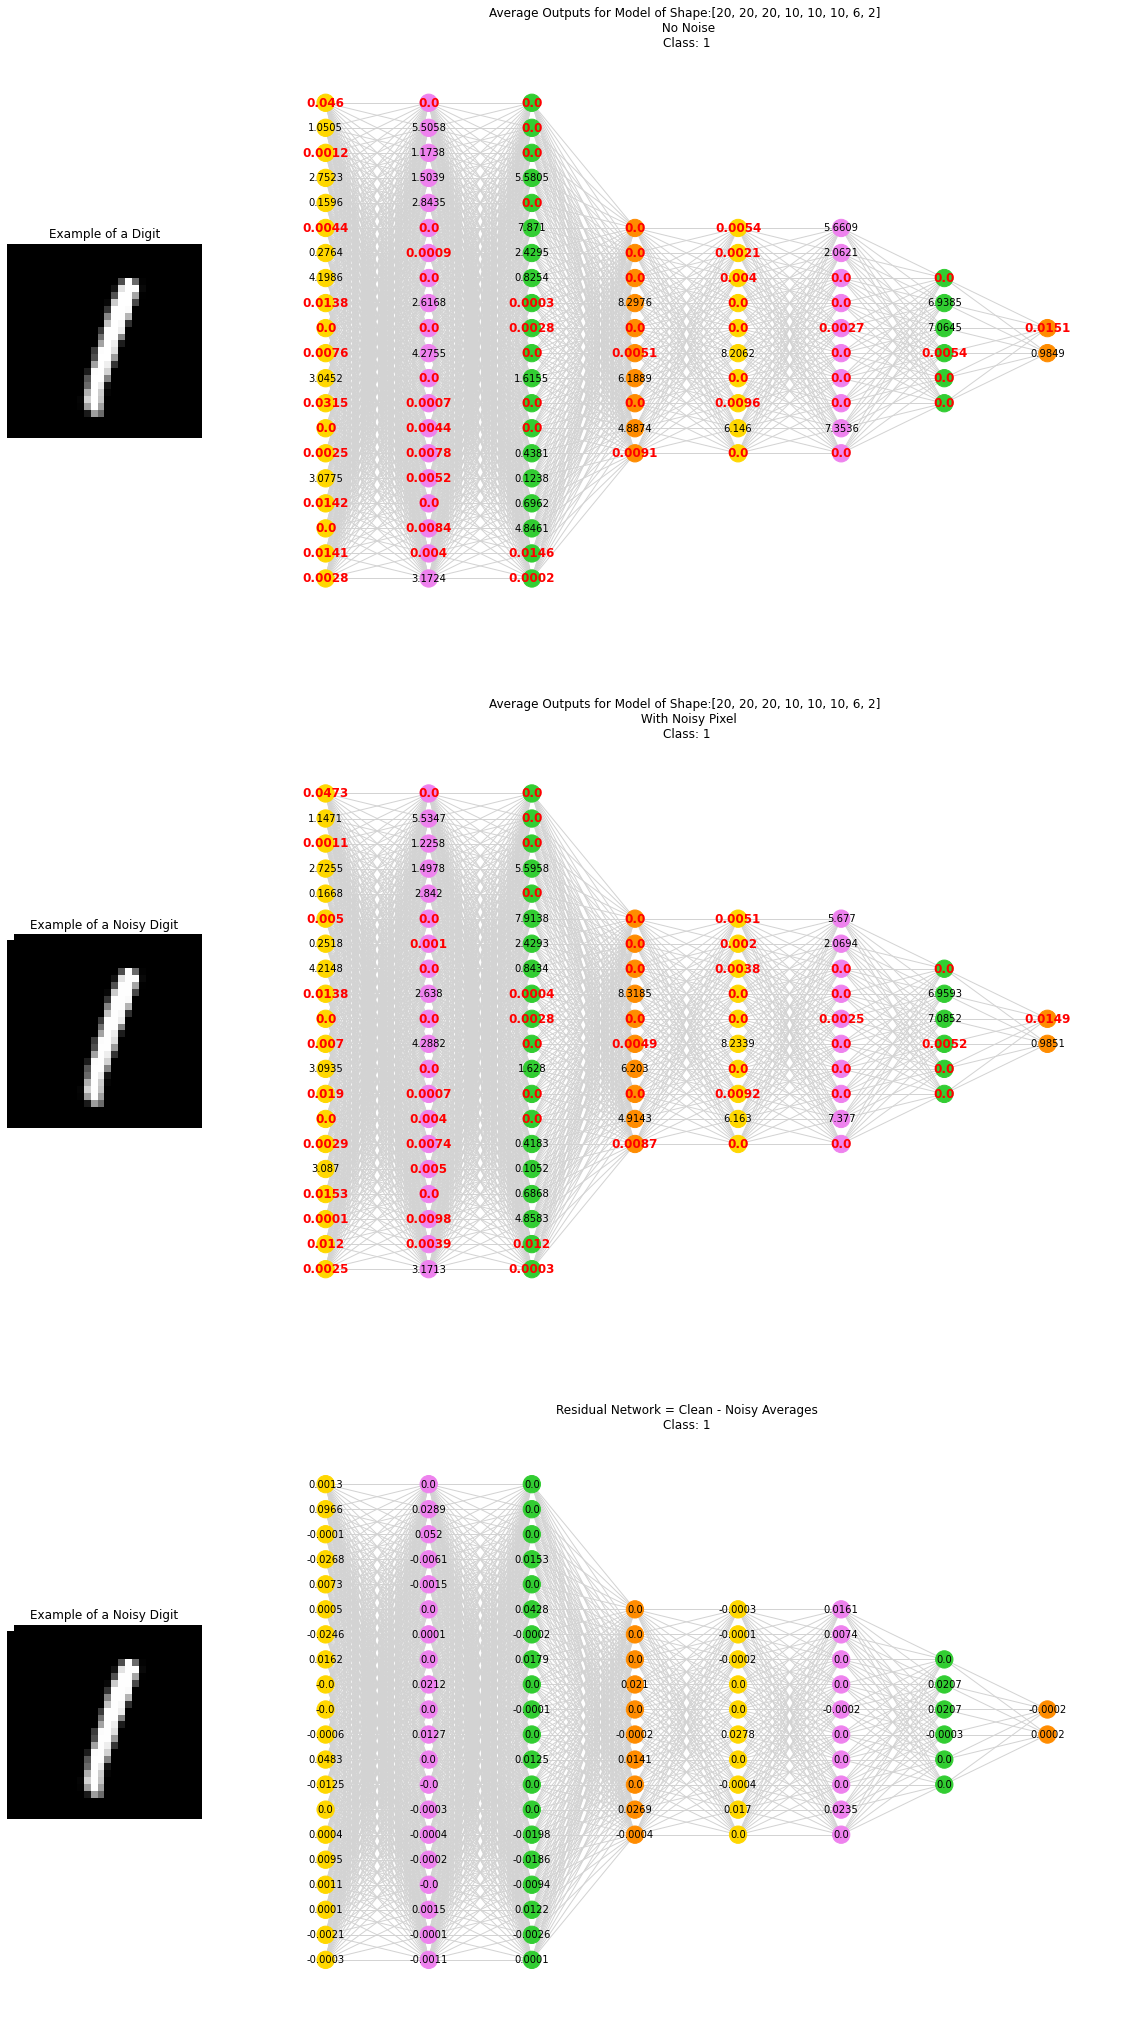

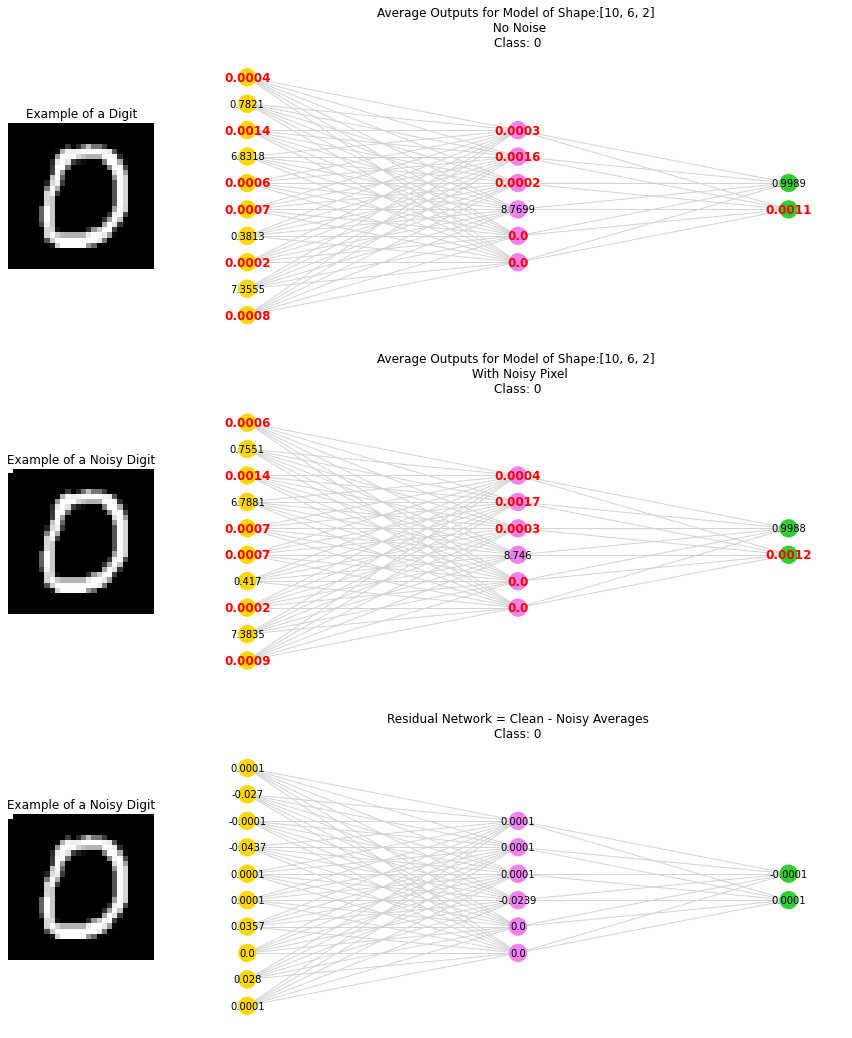

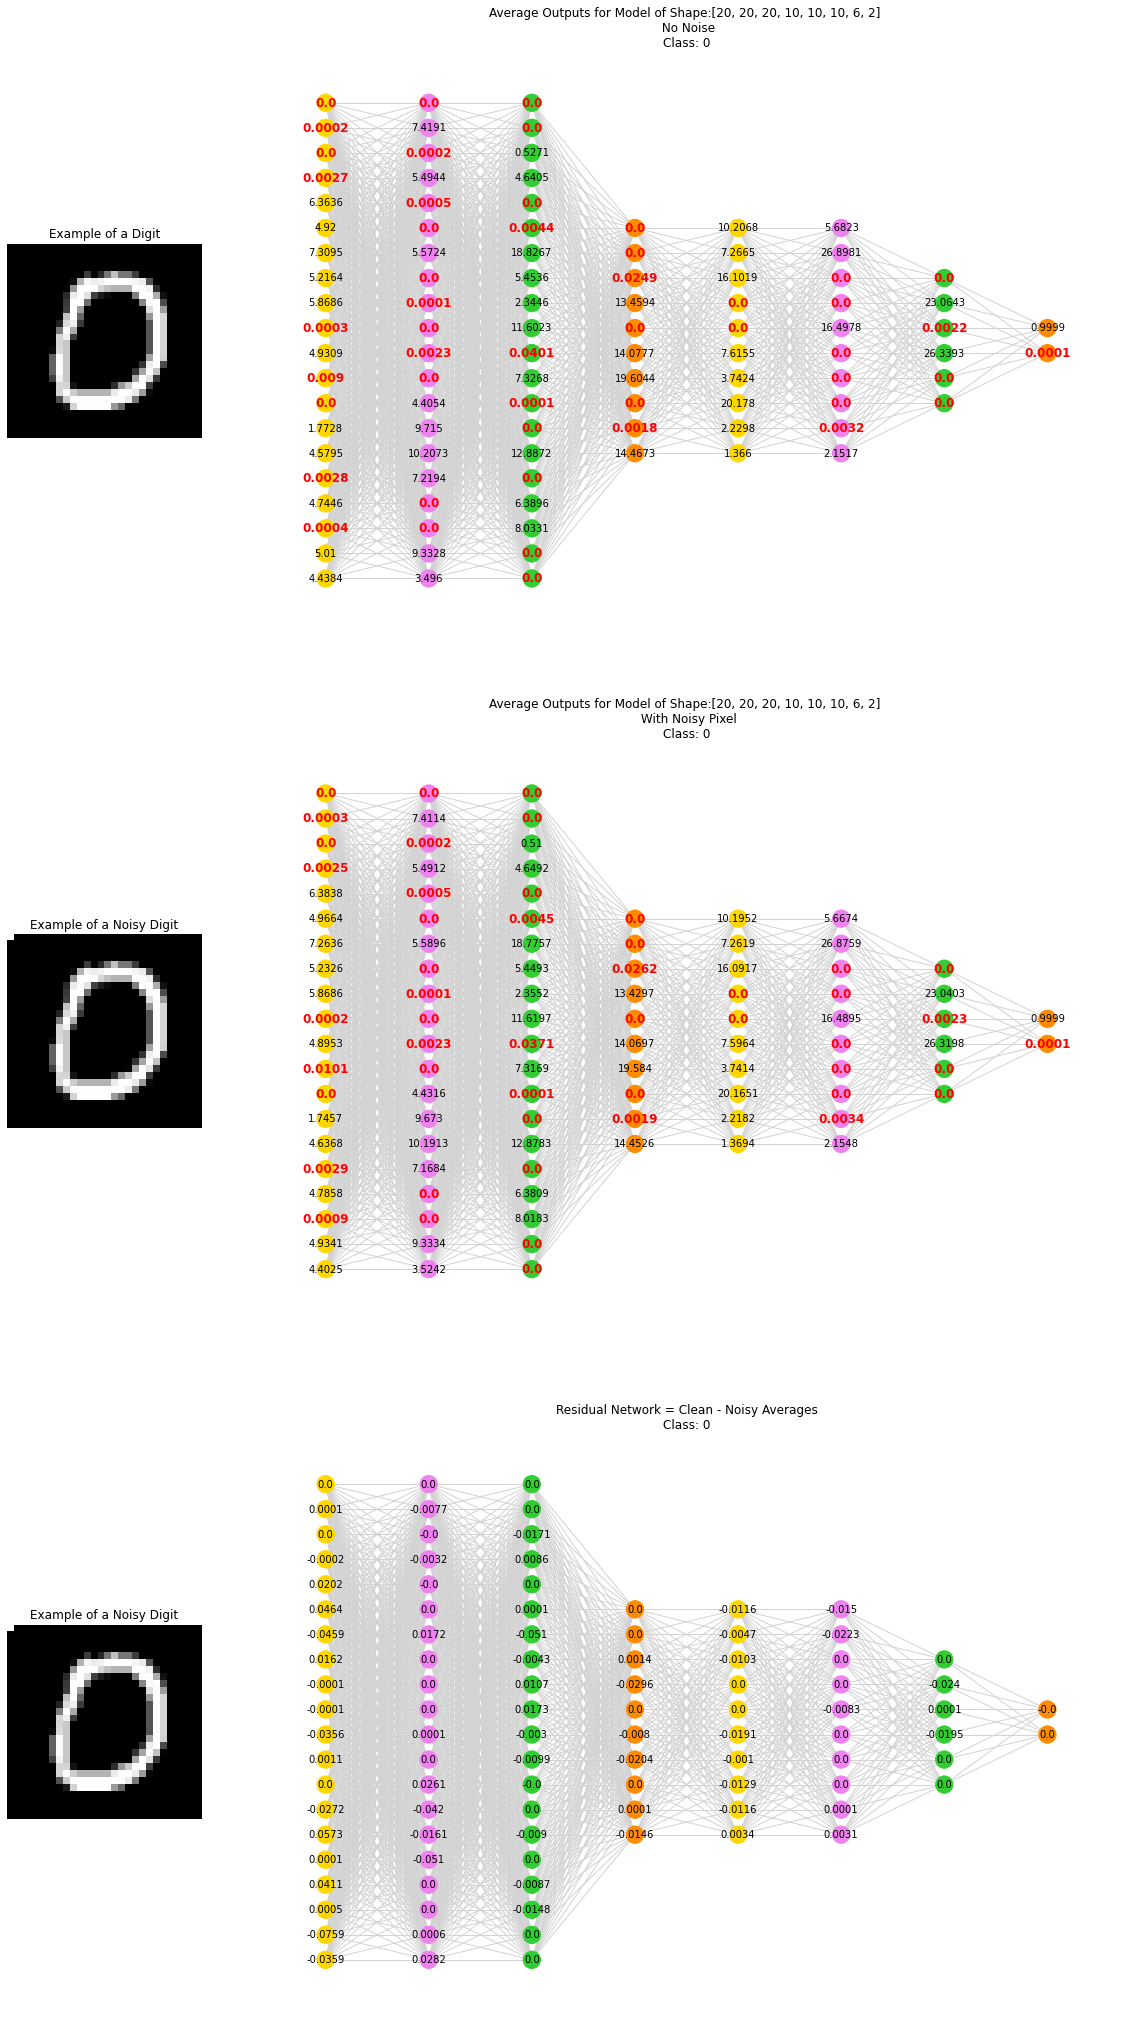

In [22]:
from matplotlib.gridspec import GridSpec
# making a subsets of ones and zeros from the test set
"""
# x_test_ones,y_test_ones = x_test[y_test==1], y_test[y_test==1]
# x_test_zeros,y_test_zeros = x_test[y_test==0], y_test[y_test==0]
# def show_model_calcs(model, X, y, n=1, ind=1, digit=1):
#     for i in range(n):
#         subset_sizes = get_subset_sizes(model)
#         plt.figure(figsize=(max(max(subset_sizes)*0.5, 15), max(max(subset_sizes)*0.5, 6)))
#         # Create a GridSpec object with 1 row and 3 columns,
#         # and set the width ratio for the columns
#         gs = GridSpec(1, 4, width_ratios=[1, 3, 1, 0])  # The last column will not be used

#         plt.subplot(gs[0, 0])
#         display_digit(X, y, digit=digit, sample=i)
#         plt.subplot(gs[0, 1:4])
#         visualize_multilayer_graph_outputs(model, X[i], subset_color, ind=ind)
#         plt.show();
"""
def compare_model_calcs(model1,model2, X, y, X_noisy, n=1, ind=1):
    for i in range(n):
        subset_sizes1 = get_subset_sizes(model1)
        subset_sizes2 = get_subset_sizes(model2)
        plt.figure(figsize=(max(max(subset_sizes1),max(subset_sizes2), 15), max(max(subset_sizes1)*2,max(subset_sizes2)*2, 6)))
        
        # Create a GridSpec object with 1 row and 3 columns,
        # and set the width ratio for the columns
        gs = GridSpec(4, 4, width_ratios=[1, 3, 1, 0])  # The last column will not be used

        plt.subplot(gs[0, 0])
        display_digit(X, y, digit=y[i], sample=i)
        plt.subplot(gs[0, 1:4])
        visualize_multilayer_graph_outputs(model1, X[i], subset_color, ind=ind)
        plt.subplot(gs[1, 0])
        display_digit(X_noisy, y, digit=y[i], sample=i)
        plt.subplot(gs[1, 1:4])
        visualize_multilayer_graph_outputs(model1, X_noisy[i], subset_color, ind=ind)
        plt.subplot(gs[2, 0])
        display_digit(X, y, digit=y[i], sample=i)
        plt.subplot(gs[2, 1:4])
        visualize_multilayer_graph_outputs(model2, X[i], subset_color, ind=ind)
        plt.subplot(gs[3, 0])
        display_digit(X_noisy, y, digit=y[i], sample=i)
        plt.subplot(gs[3, 1:4])
        visualize_multilayer_graph_outputs(model2, X_noisy[i], subset_color, ind=ind)
     
        plt.show()

def compare_model_avgs(model1,model2, X, y, X_noisy, outputs1=None,outputs2=None, outputs3=None):
    """TODO: add outputs1,2,3 as arguments"""
    subset_sizes1 = get_subset_sizes(model1)
    subset_sizes2 = get_subset_sizes(model2)
    plt.figure(figsize=(max(max(subset_sizes1),max(subset_sizes2), 15), max(max(subset_sizes1),max(subset_sizes2), 6)))
    
    # Create a GridSpec object with 1 row and 3 columns,
    # and set the width ratio for the columns
    gs = GridSpec(3, 4, width_ratios=[1, 3, 1, 0])  # The last column will not be used

    plt.subplot(gs[0, 0])
    display_digit(X, y, digit=1, sample=1)
    plt.subplot(gs[0, 1:4])
    visualize_average_multilayer_graph_outputs(model1, X[y==1], subset_color, outputs=test1avg1);
    plt.subplot(gs[1, 0])
    display_digit(X_noisy, y, digit=1, sample=1)
    plt.subplot(gs[1, 1:4])
    visualize_average_multilayer_graph_outputs(model1, X[y==1], subset_color, outputs=test1avg1pix00);
    plt.subplot(gs[2, 0])
    display_digit(X_noisy, y, digit=1, sample=1)
    plt.subplot(gs[2, 1:4])
    visualize_average_multilayer_graph_outputs(model1, X[y==1], subset_color, outputs=test1avg1pix00_diff, red=False);
    # plt.subplot(gs[3, 0])
    # display_digit(X, y, digit=1, sample=1)
    # plt.subplot(gs[3, 1:4])
    # visualize_average_multilayer_graph_outputs(model2, X[y==0], subset_color, outputs=test0avg2);
    # plt.show()

# show_model_calcs(model,  x_test_zeros, y_test_zeros, n=1, digit=0)
# show_model_calcs(model,x_test_ones,y_test_ones,n=1,digit=1)
# compare_model_calcs(model1,model2, x_test, y_test, x_test_rand_noisy, n=2, ind=ind)
# compare_model_calcs(model1,model2, x_test, y_test, x_test_pixel1)
# compare_model_avgs(model1,model2, x_test, y_test,x_test)
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def compare_model_avgs(model1, X, y, X_noisy, outputs1=None, outputs2=None, outputs3=None,digit=1):
    """
    Compare model averages with visualizations.

    :param model1: First model for comparison.
    :param model2: Second model for comparison.
    :param X: Input data.
    :param y: Labels for input data.
    :param X_noisy: Noisy input data.
    :param outputs1: Outputs from model1 (optional).
    :param outputs2: Outputs from model2 (optional).
    :param outputs3: Outputs for comparison (optional).
    """
    subset_sizes1 = get_subset_sizes(model1)
    # subset_sizes2 = get_subset_sizes(model2)
    plt.figure(figsize=(max(max(subset_sizes1), 15), max(max(subset_sizes1)*1.8, 6)))

    # Create a GridSpec object with 1 row and 3 columns, and set the width ratio for the columns
    gs = GridSpec(3, 4, width_ratios=[1, 3, 1, 0])  # The last column will not be used

    # First subplot
    plt.subplot(gs[0, 0])
    display_digit(X, y, digit=digit, sample=1)
    plt.title("Example of a Digit")

    # Second subplot
    plt.subplot(gs[0, 1:4])
    visualize_average_multilayer_graph_outputs(model1, X[y == digit], subset_color, outputs=outputs1)
    plt.title(f"Average Outputs for Model of Shape:{subset_sizes1} \n No Noise\nClass: {digit}")

    # Third subplot
    plt.subplot(gs[1, 0])
    display_digit(X_noisy, y, digit=digit, sample=1)
    plt.title("Example of a Noisy Digit")

    # Fourth subplot
    plt.subplot(gs[1, 1:4])
    visualize_average_multilayer_graph_outputs(model1, X[y == digit], subset_color, outputs=outputs2)
    plt.title(f"Average Outputs for Model of Shape:{subset_sizes1} \n With Noisy Pixel\nClass: {digit}")

    # Fifth subplot
    plt.subplot(gs[2, 0])
    display_digit(X_noisy, y, digit=digit, sample=1)
    plt.title("Example of a Noisy Digit")

    # Sixth subplot
    plt.subplot(gs[2, 1:4])
    visualize_average_multilayer_graph_outputs(model1, X[y == digit], subset_color, outputs=outputs3, red=False)
    plt.title(f"Residual Network = Clean - Noisy Averages\nClass: {digit}")

    """# # Seventh subplot
    # plt.subplot(gs[3, 0])
    # display_digit(X, y, digit=1, sample=1)
    # plt.title("Original Digit")

    # # Eighth subplot
    # plt.subplot(gs[3, 1:4])
    # visualize_average_multilayer_graph_outputs(model2, X[y == 0], subset_color, outputs=outputs3)
    # plt.title("Model 2 Average Outputs")
    """;
    plt.show()

### Noisy pixel

compare_model_avgs(model1, X=x_test, y=y_test,X_noisy=x_test_pixel00,outputs1=test1avg1, outputs2=test1avg1pix00, outputs3=test1avg1pix00_diff)
compare_model_avgs(model2, X=x_test, y=y_test,X_noisy=x_test_pixel00,outputs1=test1avg2, outputs2=test1avg2pix00, outputs3=test1avg2pix00_diff)
compare_model_avgs(model1, X=x_test, y=y_test,X_noisy=x_test_pixel00,outputs1=test0avg1, outputs2=test0avg1pix00, outputs3=test0avg1pix00_diff, digit=0)
compare_model_avgs(model2, X=x_test, y=y_test,X_noisy=x_test_pixel00,outputs1=test0avg2, outputs2=test0avg2pix00, outputs3=test0avg2pix00_diff, digit=0)


# plot_dense_layer_heatmaps

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def plot_dense_layer_heatmaps(model, input_shape=(28, 28)):
    # Find the first dense layer
    for layer in model.layers:
        if 'dense' in layer.name:
            first_dense_layer = layer
            break

    # Extract weights and biases
    weights, biases = first_dense_layer.get_weights()

    # Number of nodes in the layer
    num_nodes = weights.shape[1]

    # Reshape weights and plot heatmaps
    for i in range(num_nodes):
        # Reshape weights to match the input shape
        node_weights = weights[:, i].reshape(input_shape)

        # Plot heatmap
        plt.figure(figsize=(5, 5))
        plt.imshow(node_weights, cmap='viridis')
        plt.title(f"Heatmap for Node {i+1}")
        plt.colorbar()
        plt.show()

# Example usage with a model
# model = ... # Your Keras model
# model = tf.keras.models.load_model('models/model_[10, 6].keras')
# plot_dense_layer_heatmaps(model)
# WORKS GOOD

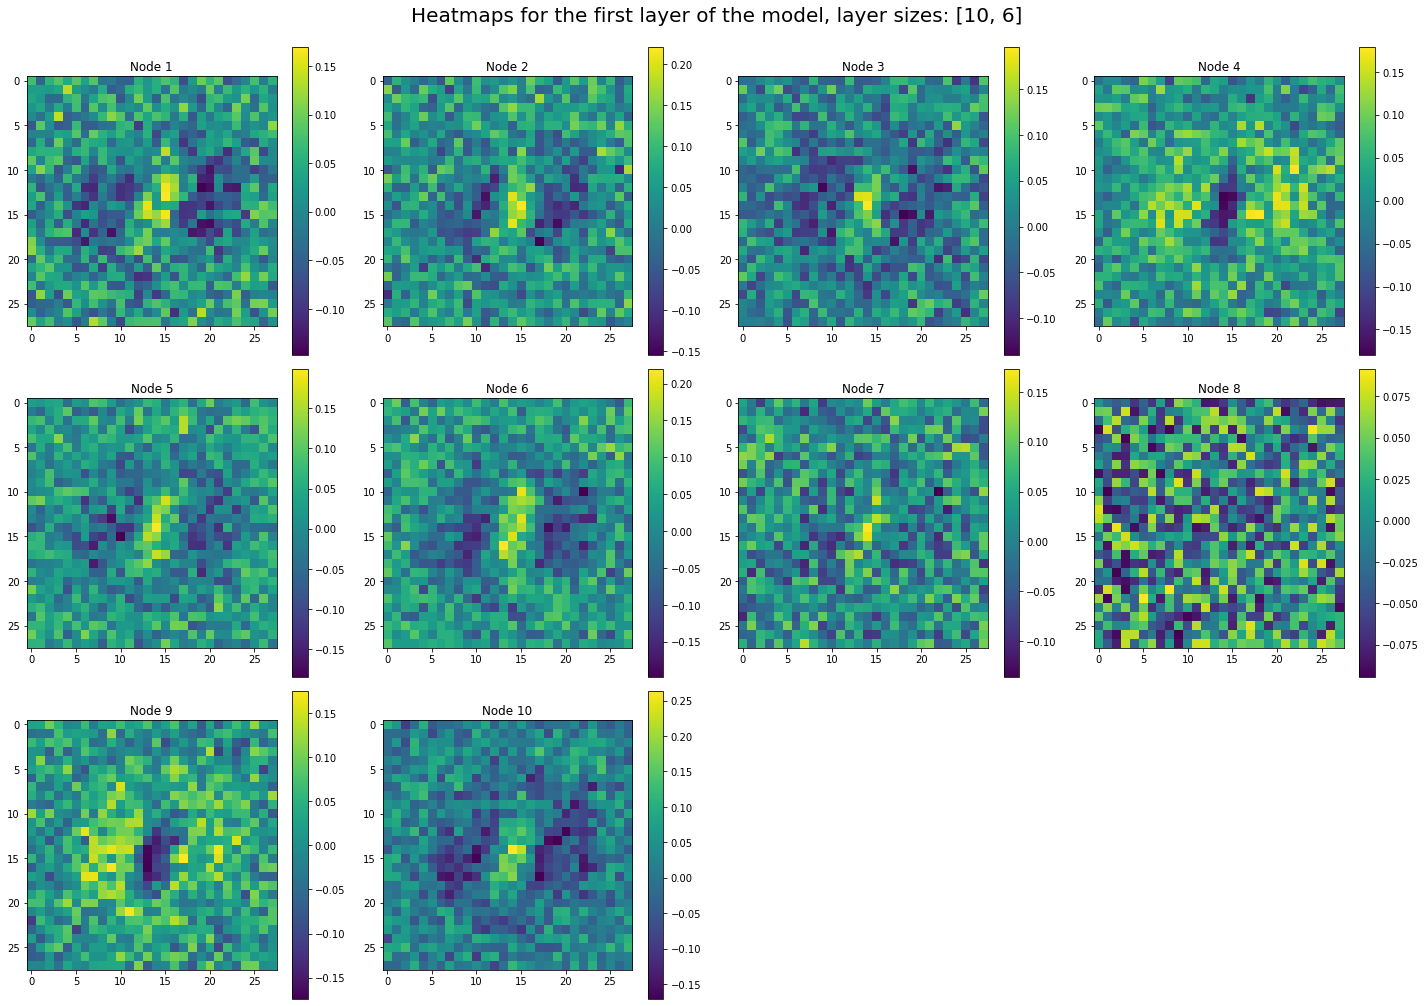

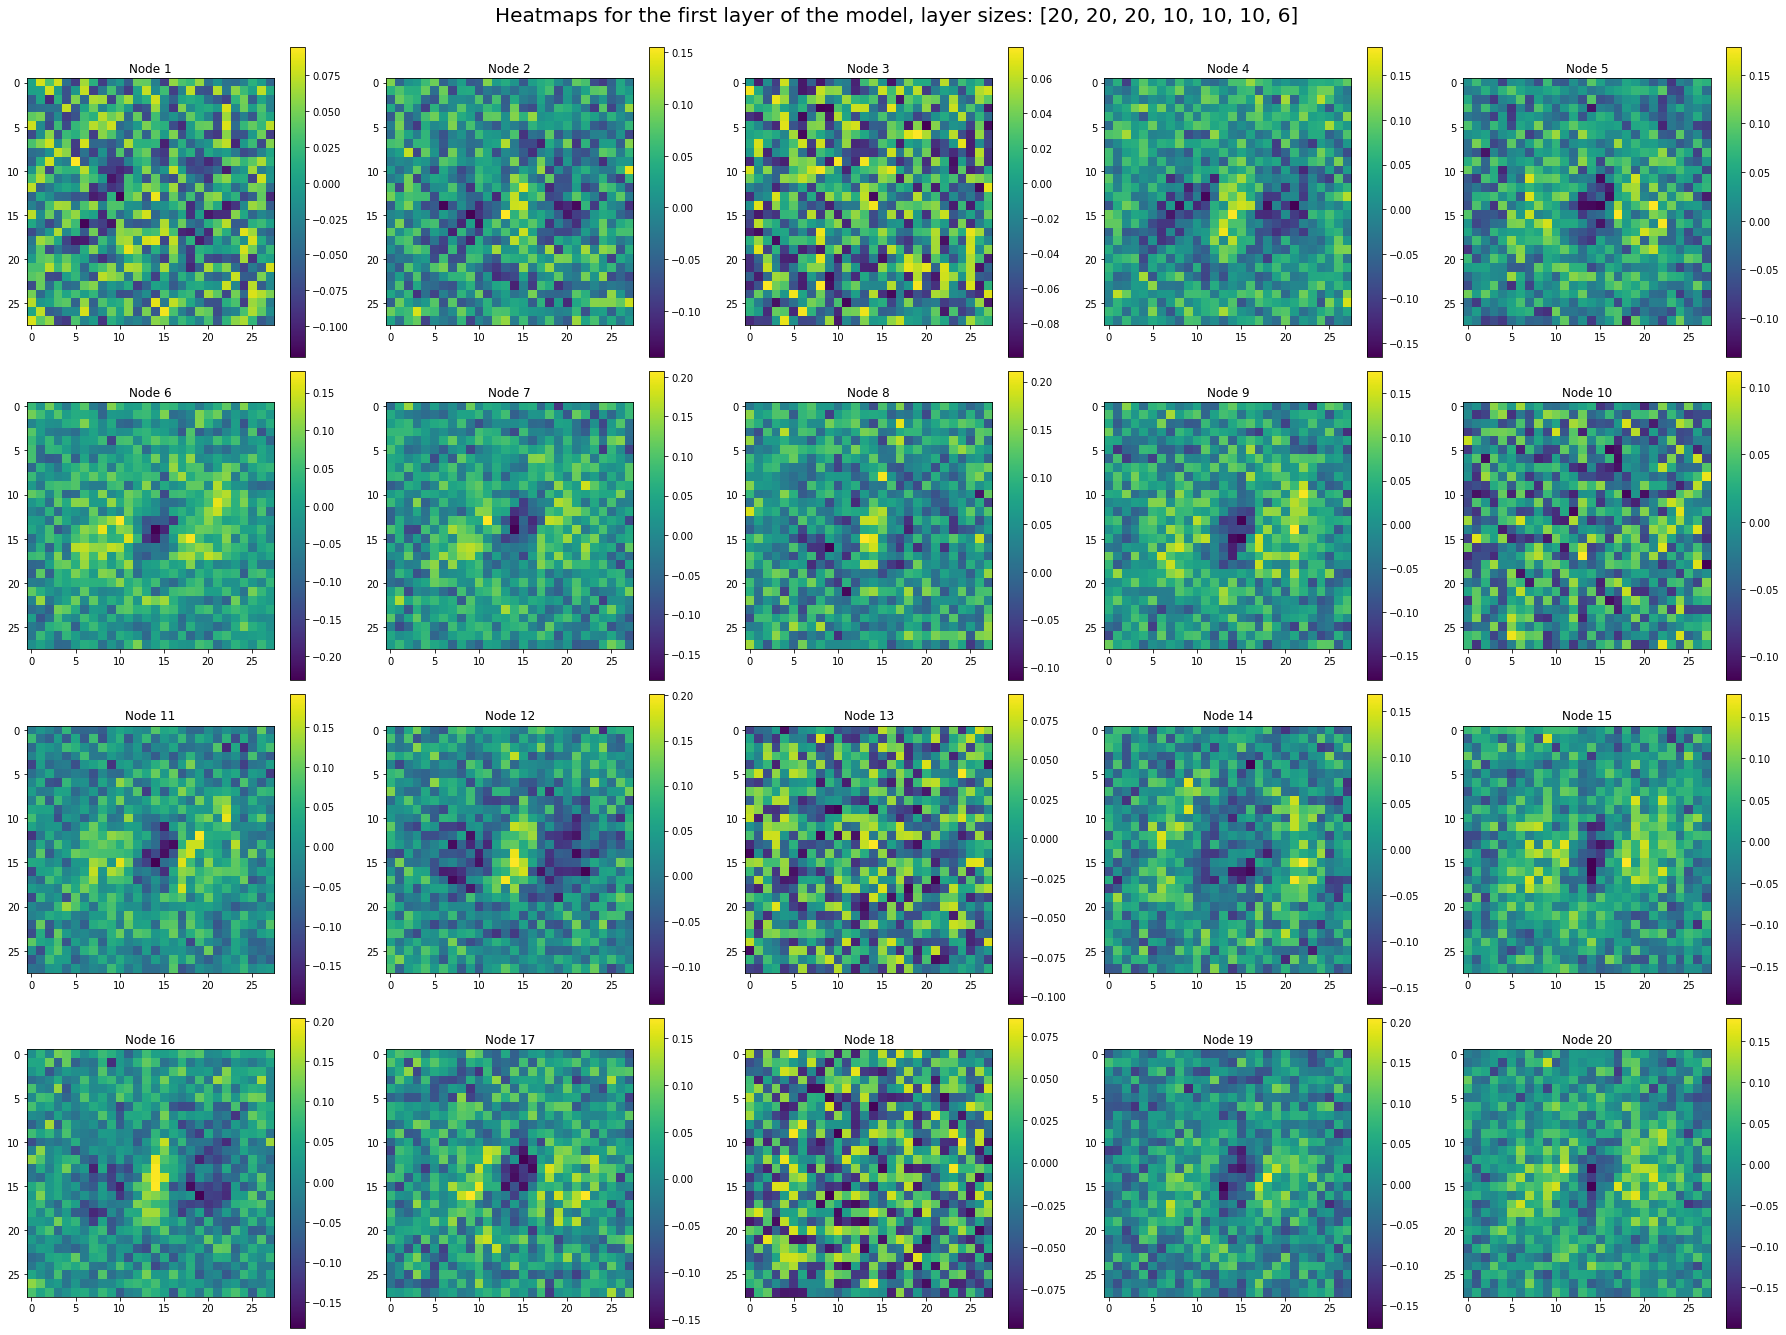

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import math

def plot_dense_layer_heatmaps(model, input_shape=(28, 28)):
    # print("The following image represents the first layer of a model with the following layer sizes (number of nodes)",get_subset_sizes(model))
    
    # Find the first dense layer
    for layer in model.layers:
        if 'dense' in layer.name:
            first_dense_layer = layer
            break

    # Extract weights and biases
    weights, biases = first_dense_layer.get_weights()

    # Number of nodes in the layer
    num_nodes = weights.shape[1]

    # Determine grid size for subplots
    grid_size = math.ceil(math.sqrt(num_nodes)) # That is kinda cool

    # Create a figure for subplots
    plt.figure(figsize=(grid_size * 5, grid_size * 5))
    # main title
    plt.suptitle(f"Heatmaps for the first layer of the model, layer sizes: {get_subset_sizes(model)[:-1]}", fontsize=20, y=0.95)
    # Reshape weights and plot heatmaps in subplots
    for i in range(num_nodes):
        # Reshape weights to match the input shape
        node_weights = weights[:, i].reshape(input_shape)

        # Add subplot for each node
        plt.subplot(grid_size, grid_size, i+1)
        plt.imshow(node_weights, cmap='viridis')
        plt.title(f"Node {i+1}")
        plt.colorbar()

    # Display the figure
    plt.tight_layout( rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage with a model
# model = ... # Your Keras model
model1 = tf.keras.models.load_model('models/model_n_[10, 6].keras')
model2 = tf.keras.models.load_model('models/model_n_[20, 20, 20, 10, 10, 10, 6].keras')

plot_dense_layer_heatmaps(model1)
plot_dense_layer_heatmaps(model2)


In [27]:
import plotly.graph_objects as go

# Load a tuned model if not loaded
# model = tf.keras.models.load_model('my_model4.keras')

ind=1
# Define dictionary to store layer weights and biases

# get subset sizes from neural network
subset_sizes =  get_subset_sizes(model,ind=ind)
# print(subset_sizes)

# Define colors for each subset
subset_color = ["gold", "violet", "limegreen", "darkorange", "gold", "violet", "limegreen", "darkorange", "gold", "violet", "limegreen", "darkorange", "gold", "violet", "limegreen", "darkorange", "gold", "violet", "limegreen", "darkorange", ]

import networkx as nx
import plotly.graph_objs as go

# define graph
G = multilayered_graph(*subset_sizes)
color = [subset_color[data["layer"]] for v, data in G.nodes(data=True)]
pos = nx.multipartite_layout(G, subset_key="layer")



# Create Edges
edge_trace = []
for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    # weights = edge[2]['weight']
    # layer = edge[2]['layer']

    trace = go.Scatter(
        x=[x0, x1, None],
        y=[y0, y1, None],
        line=dict(color='#888'),
        hoverinfo='text',
        # text= str(round(neural_network['dense_layer1']['weights'][edge[0]][edge[1]],4)),
        mode='lines'
        )
    edge_trace.append(trace)

In [28]:
# import networkx as nx
# import itertools


# def multilayered_graph_with_activations(*subset_sizes, activations=None):
#     extents = nx.utils.pairwise(itertools.accumulate((0,) + subset_sizes))
#     layers = [range(start, end) for start, end in extents]
#     G = nx.Graph()
    
#     for i, layer in enumerate(layers):
#         G.add_nodes_from(layer, layer=i)
        
#     if activations is not None:
#         # Ensure the activations list is properly structured
#         if len(activations) != len(layers) -1:
#             # return (f"The number of activations must match the number of layer pairs.
#                             #  there are {len(activations)} activation arrays and {len(layers) - 1} layer pairs.")
#             print(f"The number of activations must match the number of layer pairs. there are {len(activations)} activation arrays and {len(layers) - 1} layer pairs.") 
#             return
        
#         for i, (layer1, layer2) in enumerate(nx.utils.pairwise(layers)):
#             # print(activations[i][0])
#             # if len(activations[i][0]) != len(layer1) * len(layer2):
#             #     print(f"The number of activations does not match the number of edges between layers. There are {len(activations)} activations and {len(layer1) * len(layer2)} edges.")
#             #     raise ValueError("The number of activations does not match the number of edges between layers.")
            
#             # Iterate over each activation value and add an edge with that weight
#             for (u, v), activation in zip(itertools.product(layer1, layer2), activations[i]):
#                 print(activation)
#                 G.add_edge(u, v, weight=activation)
#     else:
#         # If no activations are provided, just create the edges without weights
#         for layer1, layer2 in nx.utils.pairwise(layers):
#             G.add_edges_from(itertools.product(layer1, layer2))
    
#     return G


# # Define dictionary to store layer weights and biases
# # print(neural_network)
# # get subset sizes from neural_network
# model = tf.keras.models.load_model('my_model4.keras')
# neural_network = nn_dict(ind=1)


# subset_sizes =  [neural_network[layer_name]['weights'].shape[1] for layer_name in neural_network]
# inputs =  get_activations(model, x_test[0].reshape(1, 28, 28))[1:]
# # print(inputs)
# G = multilayered_graph_with_activations(*subset_sizes, activations=inputs)
# G.edges(data=True)

# # Create Nodes
# node_x = []
# node_y = []
# for node in pos:
#     x, y = pos[node]
#     node_x.append(x)
#     node_y.append(y)

# # node trace
# node_trace = go.Scatter(x=node_x,y=node_y,mode='markers',hoverinfo='text',marker=dict(showscale=True,
#         colorscale='YlGnBu',size=10,color=[],line_width=2))
# outputs = get_all_layer_outputs(model, x_test[1].reshape(1, 28, 28),ind=ind)
# node_text = []
# subset_sizes =  get_subset_sizes(model,ind=ind)
# print(subset_sizes)
# for layer in range(len(outputs)):
#     for node in range(subset_sizes[layer]):
#         node_text.append( str(round(outputs[layer][0][node],4))) #len(adjacencies[1]")))
# node_trace.text = node_text


In [29]:
import networkx as nx
import plotly.graph_objs as go

model = tf.keras.models.load_model('models/model_[20, 10, 6].keras')
ind=1
subset_color = ["gold", "violet", "limegreen", "darkorange", "gold", "violet", "limegreen", "darkorange", "gold", "violet", "limegreen", "darkorange", "gold", "violet", "limegreen", "darkorange", "gold", "violet", "limegreen", "darkorange", ]
subset_sizes =  get_subset_sizes(model,ind=ind)
# define graph
G = multilayered_graph(*subset_sizes)
color = [subset_color[data["layer"]] for v, data in G.nodes(data=True)]
pos = nx.multipartite_layout(G, subset_key="layer")



# Create Edges
edge_trace = []
edge_text = []
for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    # weights = edge[2]['weight']
    # layer = edge[2]['layer']

    trace = go.Scatter(
        x=[x0, x1, None],
        y=[y0, y1, None],
        line=dict(color='#888'),
        hoverinfo='text',
        # text= 'transformed_input',
        mode='lines'
        )
    edge_trace.append(trace)
    edge_text.append(str("transformed_input"))
# edge_trace.text = edge_text

# Edges text
# inputs =  get_activations(model, x_test[0].reshape(1, 28, 28))
# inputs_subset_sizes = [inputs[layer][0].shape[0] for layer in range(len(inputs))]

# edge_text = []
# for layer in range(len(inputs)):
#     for edge in range(inputs_subset_sizes[layer]):
#         edge_text.append( str(round(inputs[layer][0][node],4))) #len(adjacencies[1]")))
        # edge


# Create Nodes
node_x = []
node_y = []
for node in pos:
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

# node trace
node_trace = go.Scatter(x=node_x,y=node_y,mode='markers',hoverinfo='text',marker=dict(showscale=True,
        colorscale='YlGnBu',size=10,color=[],line_width=2))
outputs = get_all_layer_outputs(model, x_test[1].reshape(1, 28, 28),)
node_text = []
subset_sizes =  get_subset_sizes(model,ind=ind)
print(subset_sizes)
for layer in range(len(outputs)):
    for node in range(subset_sizes[layer]):
        node_text.append( str(round(outputs[layer][0][node],4))) #len(adjacencies[1]")))
node_trace.text = node_text



# Color Node Points
# for node, adjacencies in enumerate(G.adjacency()):
#     node_trace['marker']['color'].append(len(adjacencies[1]))

# Create Network Graph
fig = go.Figure(data=edge_trace + [node_trace],
                layout=go.Layout(
                    title='<br>Network graph made with Python',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        text="Made by Aviv Gelfand",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

# Show plot
fig.show()


[20, 10, 6, 2]


In [30]:
# # Best version 0 # error index
# import tensorflow as tf
# import itertools
# import matplotlib.pyplot as plt
# import networkx as nx
# import numpy as np

# # Load a tuned model
# model = tf.keras.models.load_model('my_model4.keras')

# ind=1
# subset_sizes = get_subset_sizes(model)
# subset_color = ["gold", "violet", "limegreen", "darkorange", "gold", "limegreen", "limegreen", "darkorange"]

# display_digit(x_test, y_test, digit=0, sample=0)

# def multilayered_graph(*subset_sizes):
#     extents = nx.utils.pairwise(itertools.accumulate((0,) + subset_sizes))
#     layers = [range(start, end) for start, end in extents]
#     G = nx.Graph()
#     for i, layer in enumerate(layers):
#         G.add_nodes_from(layer, layer=i)
#     for layer1, layer2 in nx.utils.pairwise(layers):
#         G.add_edges_from(itertools.product(layer1, layer2))
#     return G


# G = multilayered_graph(*subset_sizes)
# # print(G.nodes(data=True))
# color = [subset_color[data["layer"]] for v, data in G.nodes(data=True)]
# pos = nx.multipartite_layout(G, subset_key="layer")
# plt.figure(figsize=(max(subset_sizes)*0.5, max(subset_sizes)*0.5))
# nx.draw(G, pos, node_color=color, with_labels=False,)
# # nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")
# # edge_labels = nx.draw_networkx_edge_labels(G, pos= {k: (v[0], v[1]-0.05) for k,v in pos.items()},label_pos=1,
#                                             #  edge_labels={(u,v):f"{u+1}-{v+1}" for u,v in G.edges()}, font_size=8, font_color="black")
# # nx.draw_networkx_edge_labels(G, pos= {k: (v[0]+0.02, v[1]-0.05) for k,v in pos.items()},label_pos=1,
#                                                 # edge_labels={(u,v):f"{u+1}-{v+1}" for u,v in G.edges()}, font_size=8, font_color="black")

# outputs = get_all_layer_outputs(model, x_test[0].reshape(1, 28, 28),ind=ind)
# # subset_sizes =  [neural_network[layer_name]['weights'].shape[1] for layer_name in neural_network]
# for layer in range(len(outputs)):
#     for node in range(subset_sizes[layer]):
#         plt.text(pos[node+sum(subset_sizes[:layer])][0], pos[node+sum(subset_sizes[:layer])][1], 
#              str(round(outputs[layer][0][node],3))  ,fontsize=8,ha='center', va= 'center')

# plt.show()

In [31]:
# import tensorflow as tf

# def get_activations(model, data_sample):
#     """
#     This function computes and returns the activations of all nodes in all layers
#     of a TensorFlow model for a given data sample.

#     Parameters:
#     model (tf.keras.Model): A TensorFlow/Keras model that has been compiled and possibly trained.
#     data_sample (np.array): An input data sample for which to compute the activations.

#     Returns:
#     activations (List[np.array]): A list of numpy arrays containing the activations of each layer's nodes.
#     """
    
#     # This list comprehension constructs a list of the model's layers, excluding the input layer.
#     layer_outputs = [layer.output for layer in model.layers] # all layer outputs except first (input) layer
    
#     # Create a model that will return these outputs, given the model input
#     activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs,verbose=0)
    
#     # This will return a list of numpy arrays (one array per layer)
#     activations = activation_model.predict(data_sample)[:-1]
    
#     return activations

# # Note: Ensure that `data_sample` is a NumPy array with the correct shape expected by the model's input layer.

# print(len(get_activations(loaded_model, x_test[0].reshape(1, 28, 28))))
# lengt = get_activations(loaded_model, x_test[0].reshape(1, 28, 28))
# len(lengt)